In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df=pd.read_csv("/content/water_quality_dataset.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/water_quality_dataset.csv'

In [ ]:
df.head()

,pH,Turbidity,Temperature,Dissolved_Oxygen,Conductivity,Nitrate,Phosphate,Quality
0,8.113430,4.996702,14.810977,12.299983,268.677485,4.618542,19.439754,0
1,6.533079,7.467468,15.480494,6.845120,143.814642,3.037686,2.845980,0
2,6.873616,5.626668,28.414759,8.466397,199.017715,30.209598,17.825036,0
3,7.809811,0.833026,11.534790,11.632806,452.968483,48.305816,6.574192,1
4,7.251519,1.855802,22.191216,9.820893,244.339971,25.136065,0.253135,1


**Data preprocessing**

In [ ]:
df.tail()

,pH,Turbidity,Temperature,Dissolved_Oxygen,Conductivity,Nitrate,Phosphate,Quality
2495,7.801767,5.149879,27.540773,12.105292,230.994804,40.973338,19.045509,0
2496,6.855597,4.799257,10.936279,13.676889,390.786538,20.588865,14.956484,0
2497,6.602479,6.047098,16.073969,14.756521,469.309635,17.394697,0.389117,0
2498,7.865923,4.794462,18.866400,14.523515,354.914259,49.067436,8.020097,0
2499,7.002158,9.343757,13.445296,8.253278,480.735419,46.340168,5.147960,0


In [ ]:
df.isna().sum()

,0
pH,0
Turbidity,0
Temperature,0
Dissolved_Oxygen,0
Conductivity,0
Nitrate,0
Phosphate,0
Quality,0


In [ ]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.dtypes

,0
pH,float64
Turbidity,float64
Temperature,float64
Dissolved_Oxygen,float64
Conductivity,float64
Nitrate,float64
Phosphate,float64
Quality,int64


**EDA**

In [ ]:
df.describe()

,pH,Turbidity,Temperature,Dissolved_Oxygen,Conductivity,Nitrate,Phosphate,Quality
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,7.496253,5.046139,20.215110,10.128860,301.867300,24.876722,9.702258,0.126000
std,0.581578,2.879091,5.754562,2.916003,114.341157,14.330173,5.648207,0.331916
min,6.502407,0.002525,10.012233,5.000481,100.203996,0.005512,0.006887,0.000000
25%,6.983046,2.566571,15.382560,7.621697,202.255551,12.610919,4.855368,0.000000
50%,7.484689,5.148794,20.202733,10.222370,302.126577,25.007401,9.553140,0.000000
75%,8.016059,7.508505,25.024025,12.685386,398.732649,36.996667,14.409474,0.000000
max,8.499610,9.999248,29.997429,14.999010,499.780209,49.979919,19.994642,1.000000


In [ ]:
df.corr()

,pH,Turbidity,Temperature,Dissolved_Oxygen,Conductivity,Nitrate,Phosphate,Quality
pH,1.000000,-0.004418,0.005819,0.012590,-0.006424,0.019950,0.024190,0.011163
Turbidity,-0.004418,1.000000,0.030063,0.001558,-0.000917,0.000845,0.019914,-0.344546
Temperature,0.005819,0.030063,1.000000,0.036951,0.019324,0.018649,-0.041271,-0.007043
Dissolved_Oxygen,0.012590,0.001558,0.036951,1.000000,0.034074,-0.020158,0.027078,-0.076868
Conductivity,-0.006424,-0.000917,0.019324,0.034074,1.000000,0.009733,-0.001516,-0.011915
Nitrate,0.019950,0.000845,0.018649,-0.020158,0.009733,1.000000,0.000900,0.024518
Phosphate,0.024190,0.019914,-0.041271,0.027078,-0.001516,0.000900,1.000000,0.013005
Quality,0.011163,-0.344546,-0.007043,-0.076868,-0.011915,0.024518,0.013005,1.000000


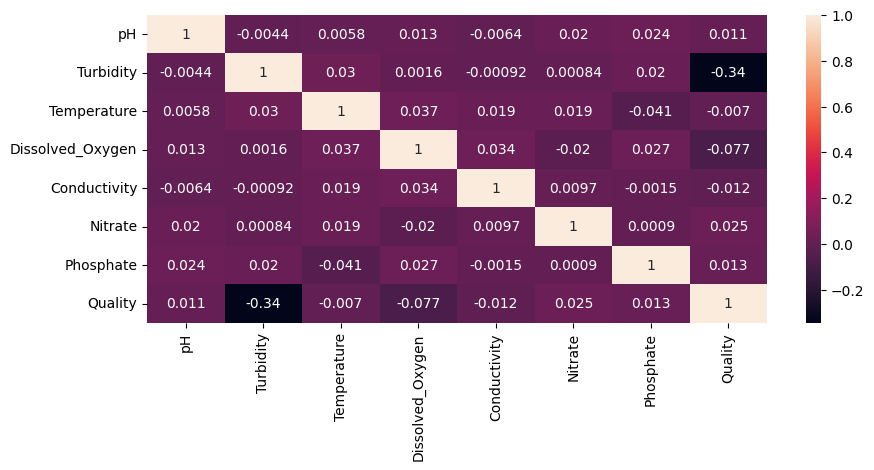

In [ ]:
#heatmap for correlaton values
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

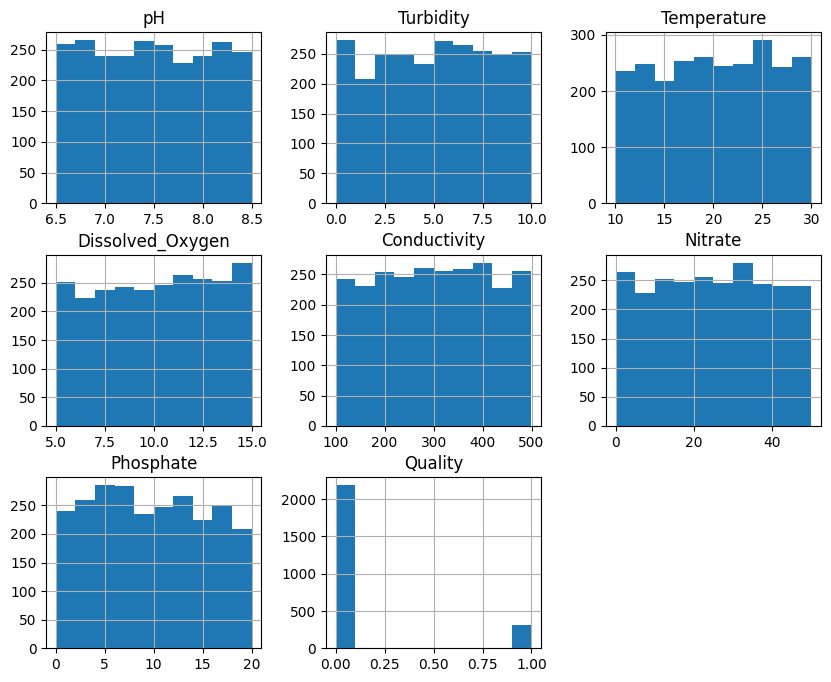

In [ ]:
df.hist(figsize=(10,8)) ## Displaying histograms by using hist() function
plt.show()

In [ ]:
df['pH'].hist()

NameError: name 'df' is not defined

In [ ]:
df['Quality'].value_counts()

,count
Quality,
0,2185
1,315


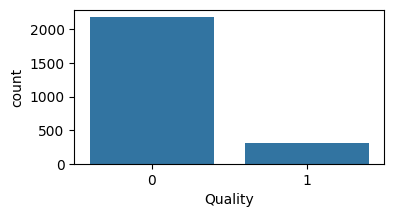

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(x='Quality', data=df) ##Displaying the countplot() used to represent the count of categorical values in potability column
plt.show()

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X

,pH,Turbidity,Temperature,Dissolved_Oxygen,Conductivity,Nitrate,Phosphate
0,8.113430,4.996702,14.810977,12.299983,268.677485,4.618542,19.439754
1,6.533079,7.467468,15.480494,6.845120,143.814642,3.037686,2.845980
2,6.873616,5.626668,28.414759,8.466397,199.017715,30.209598,17.825036
3,7.809811,0.833026,11.534790,11.632806,452.968483,48.305816,6.574192
4,7.251519,1.855802,22.191216,9.820893,244.339971,25.136065,0.253135
...,...,...,...,...,...,...,...
2495,7.801767,5.149879,27.540773,12.105292,230.994804,40.973338,19.045509
2496,6.855597,4.799257,10.936279,13.676889,390.786538,20.588865,14.956484
2497,6.602479,6.047098,16.073969,14.756521,469.309635,17.394697,0.389117
2498,7.865923,4.794462,18.866400,14.523515,354.914259,49.067436,8.020097


In [ ]:
y

,Quality
0,0
1,0
2,0
3,1
4,1
...,...
2495,0
2496,0
2497,0
2498,0


**Data splitting**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

**Random Forest**

In [ ]:
#random forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


Accuracy: 1.0
Confusion matrix:
 [[436   0]
 [  0  64]]


**Naive bayes**

In [ ]:
#naive bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

Accuracy: 0.934
Confusion matrix:
 [[436   0]
 [ 33  31]]


Hyperparameter Tuning

        Hyperparameter Tuning for naive bayes


In [ ]:
# prompt: for the above hyperparameter classifier model print training and testing accuracy

from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred = best_md.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Testing accuracy
test_accuracy = accuracy_score(y_test, y_pred_rf)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.998


HyperParameter tuning for naive bayes

In [ ]:
#hyperparameter tuning for naive bayes
param_grid = {
'criterion': ['gini', 'entropy'], #quality of the split
'max_depth': [None,3,4,5], #depth of tree if None it divides until
}

In [ ]:
# Hyperparameter tuning for Naive Bayes
param_dist = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

random_search = RandomizedSearchCV(GaussianNB(), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, verbose=3)
random_search.fit(x_train, y_train)

print("Best parameters found: ", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END var_smoothing=2.848035868435799e-08;, score=0.915 total time=   0.0s
[CV 2/5] END var_smoothing=2.848035868435799e-08;, score=0.922 total time=   0.0s
[CV 3/5] END var_smoothing=2.848035868435799e-08;, score=0.927 total time=   0.0s
[CV 4/5] END var_smoothing=2.848035868435799e-08;, score=0.912 total time=   0.0s
[CV 5/5] END var_smoothing=2.848035868435799e-08;, score=0.925 total time=   0.0s
[CV 1/5] END var_smoothing=1.5199110829529332e-05;, score=0.912 total time=   0.0s
[CV 2/5] END var_smoothing=1.5199110829529332e-05;, score=0.905 total time=   0.0s
[CV 3/5] END var_smoothing=1.5199110829529332e-05;, score=0.912 total time=   0.0s
[CV 4/5] END var_smoothing=1.5199110829529332e-05;, score=0.905 total time=   0.0s
[CV 5/5] END var_smoothing=1.5199110829529332e-05;, score=0.900 total time=   0.0s
[CV 1/5] END var_smoothing=4.3287612810830526e-07;, score=0.915 total time=   0.0s
[CV 2/5] END var_smoothing=4.32

In [ ]:
best_nb_model = random_search.best_estimator_

y_pred_train = best_nb_model.predict(x_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {training_accuracy}")

y_pred_test = best_nb_model.predict(x_test)
testing_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {testing_accuracy}")

Training Accuracy: 0.9235
Testing Accuracy: 0.928


Predictive System

In [ ]:
def predict_water_quality(pH, Turbidity, Temperature, Dissolved_Oxygen, Conductivity,
                       Nitrate, Phosphate):
    user_input = np.array([pH, Turbidity, Temperature, Dissolved_Oxygen, Conductivity,
                           Nitrate, Phosphate]).reshape(1, -1)
    prediction = best_md.predict(user_input)
    return prediction[0]

# Example usage:
ph = float(input("Enter pH value: "))
Turbidity = float(input("Enter Turbidity: "))
Temperature = float(input("Enter Temperature: "))
Dissolved_Oxygen = float(input("Enter Dissolved_Oxygen: "))
Nitrate = float(input("Enter Nitrate: "))
Conductivity = float(input("Enter Conductivity: "))
Phosphate = float(input("Enter  Phosphate: "))
prediction = predict_water_quality(ph, Turbidity, Temperature, Dissolved_Oxygen, Conductivity, Nitrate, Phosphate)

if prediction == 1:
    print("The predicted water quality is Potable.")
else:
    print("The predicted water quality is Not Potable.")

Enter pH value: 7.5
Enter Turbidity: 1.85
Enter Temperature: 22.191
Enter Dissolved_Oxygen: 9.8
Enter Nitrate: 244
Enter Conductivity: 25
Enter  Phosphate: 0.25
The predicted water quality is Potable.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
